<a href="https://colab.research.google.com/github/johan-q/Hummer-House/blob/main/DELOREYES_JOHANSEN(CPE28).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Step 1: Load personnel.csv
df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/personnel_data.csv')




# Step 3: Use random_state = 101 and n_init = 'auto' for KMeans
random_state = 101


In [56]:
X = df[['Experience', 'Salary']]

In [57]:
Sum_of_squared_distances = []
K = range(1, 15)


In [58]:
for k in K:
    model = KMeans(n_clusters=k, random_state=random_state, n_init='auto')
    model.fit(X)
    Sum_of_squared_distances.append(model.inertia_)


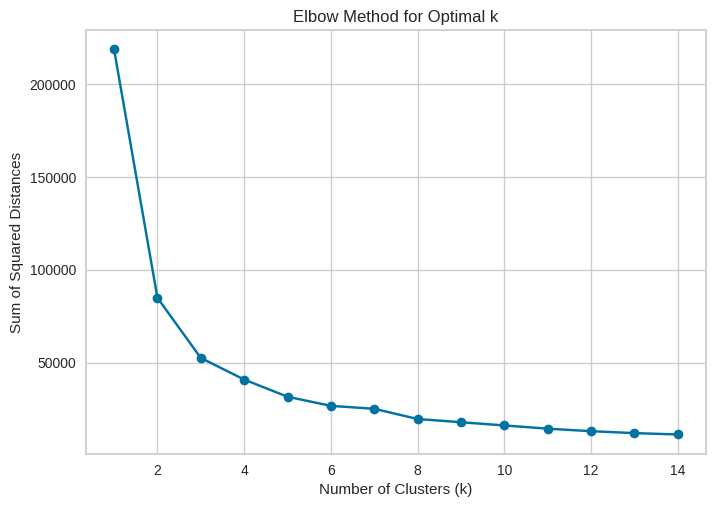

In [59]:
#Number 1
# Plot Elbow Method result
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()


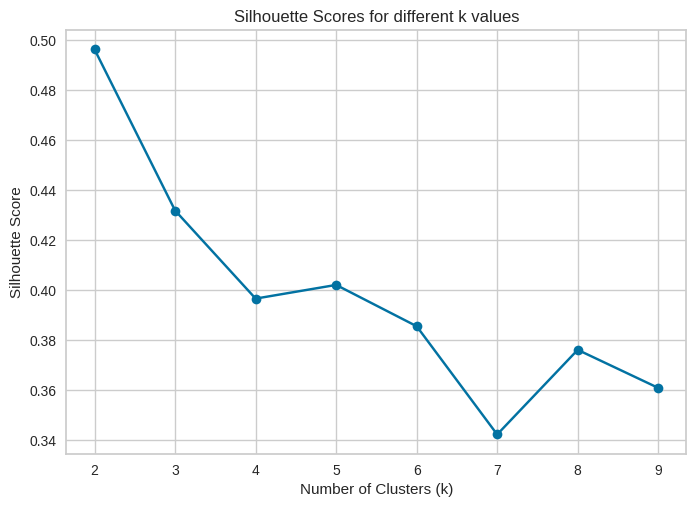

In [60]:
#Number 2
# Step 5: Compute silhouette score for each number of clusters
silhouette_scores = []

for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=random_state, n_init='auto')
    predictions = model.fit_predict(X)
    score = silhouette_score(X, predictions)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different k values')
plt.show()


Cluster 0: [18.57142857 52.35931034]
Cluster 1: [27.4        75.18593103]
Cluster 2: [ 6.00657895 33.08552632]


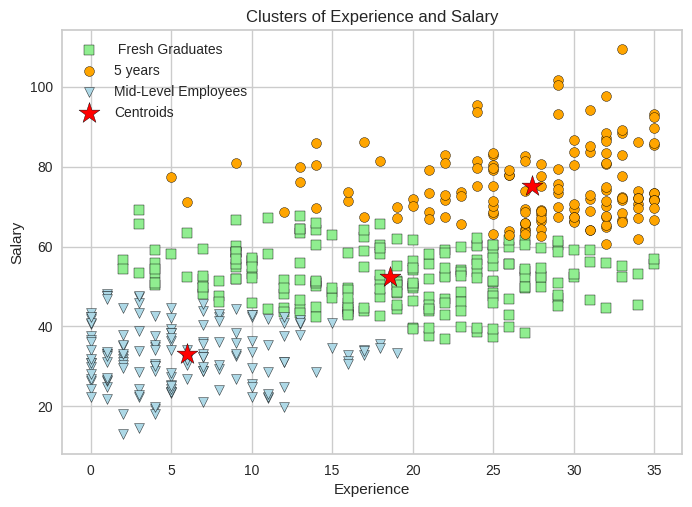

In [61]:
# Step 6: Apply KMeans with the optimal number of clusters (determined by the elbow and silhouette method)
optimal_k = 3  # (replace with the actual optimal k)
model = KMeans(n_clusters=optimal_k, random_state=random_state, n_init='auto')
predictions = model.fit_predict(X)

# Step 7: Get cluster centroids
centroids = model.cluster_centers_

# Print Centroids
for i, centroid in enumerate(centroids):
    print(f'Cluster {i}: {centroid}')

# Step 8: Visualization of Clusters
plt.scatter(X[predictions == 0].iloc[:, 0], X[predictions == 0].iloc[:, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label=' Fresh Graduates')
plt.scatter(X[predictions == 1].iloc[:, 0], X[predictions == 1].iloc[:, 1], s=50, c='orange', marker='o', edgecolor='black', label='5 years')
plt.scatter(X[predictions == 2].iloc[:, 0], X[predictions == 2].iloc[:, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='Mid-Level Employees')

# Plot centroids
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='Centroids')

plt.title('Clusters of Experience and Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [52]:
X = df[['Age', 'Salary']]